/tmp/ipython-input-1641820295.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


Accuracy: 0.9080
Precision: 0.8721
Recall: 0.9557
F1-Score: 0.9120
ROC AUC: 0.9726


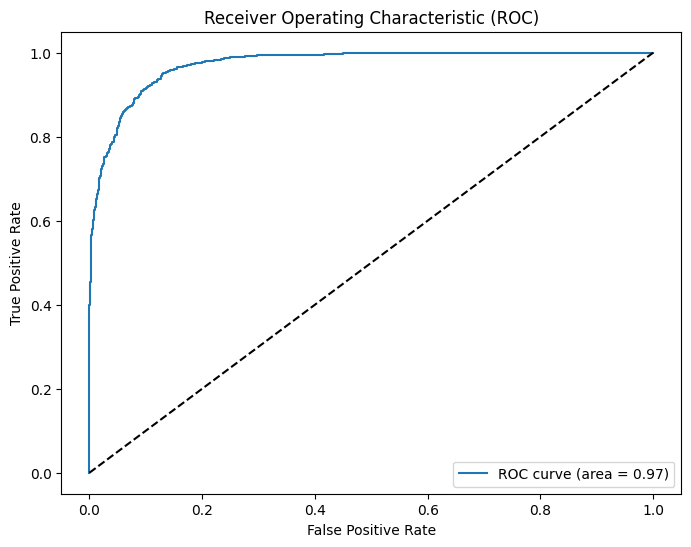

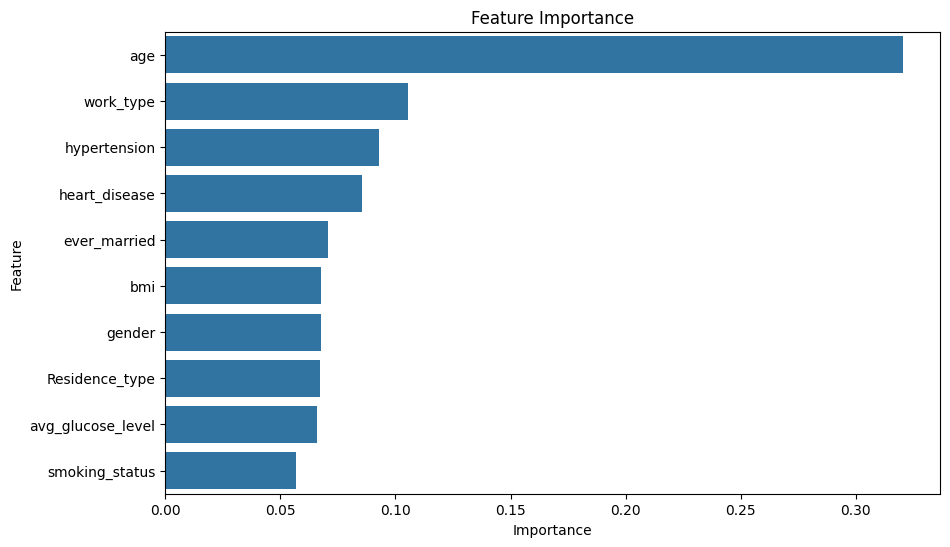

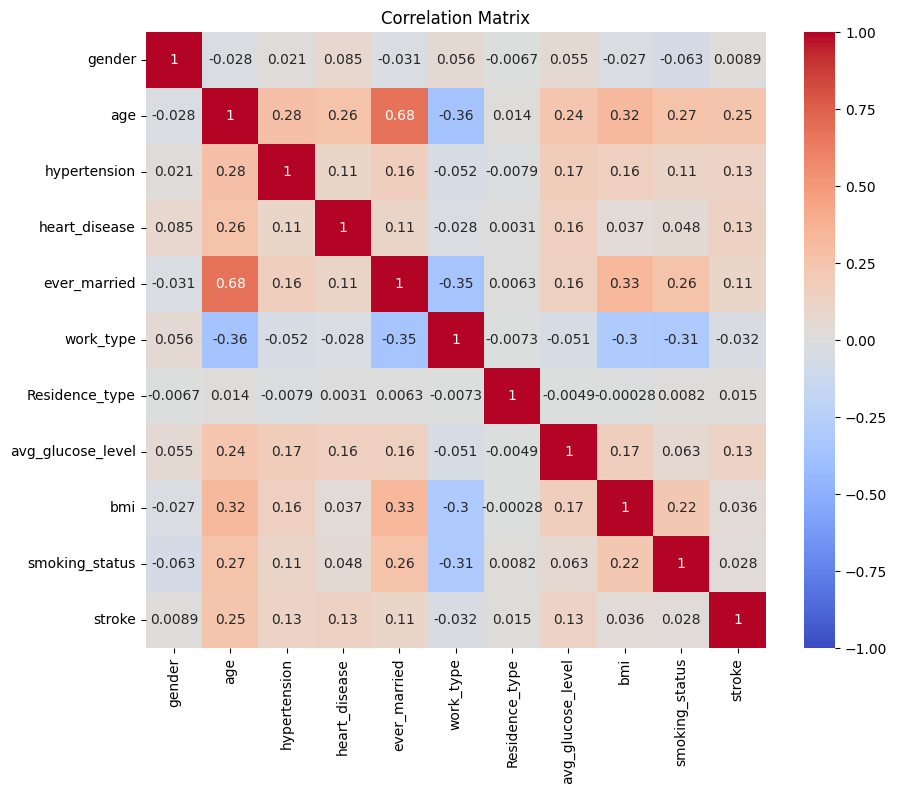

In [4]:
!pip install imbalanced-learn xgboost
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Wczytanie danych
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Preprocessing
# Zamiana 'N/A' na NaN w kolumnie bmi
data['bmi'] = data['bmi'].replace('N/A', np.nan)
data['bmi'] = data['bmi'].astype(float)
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# Usunięcie kolumny id
data = data.drop('id', axis=1)

# Kodowanie zmiennych kategorycznych
label_enc = LabelEncoder()
data['gender'] = label_enc.fit_transform(data['gender'])
data['ever_married'] = label_enc.fit_transform(data['ever_married'])
data['work_type'] = label_enc.fit_transform(data['work_type'])
data['Residence_type'] = label_enc.fit_transform(data['Residence_type'])
data['smoking_status'] = label_enc.fit_transform(data['smoking_status'])

# Skalowanie zmiennych numerycznych
scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])

# Podział na cechy i etykiety
X = data.drop('stroke', axis=1)
y = data['stroke']

# Balansowanie danych za pomocą SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Budowa modelu XGBoost
model = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=1, random_state=42)
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Sprawdzenie modelu
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Krzywa ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Ważność cech
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Analiza korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

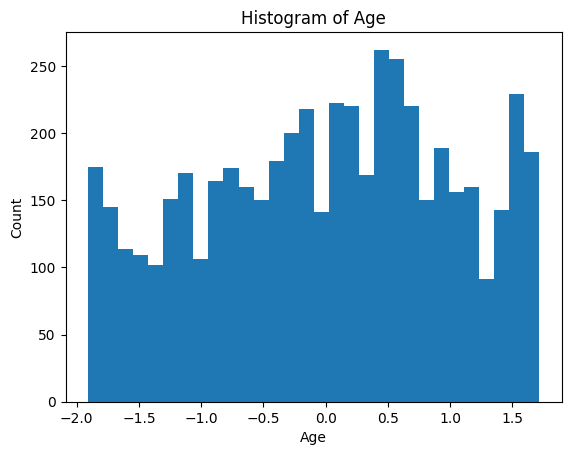

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(data['age'].dropna(), bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

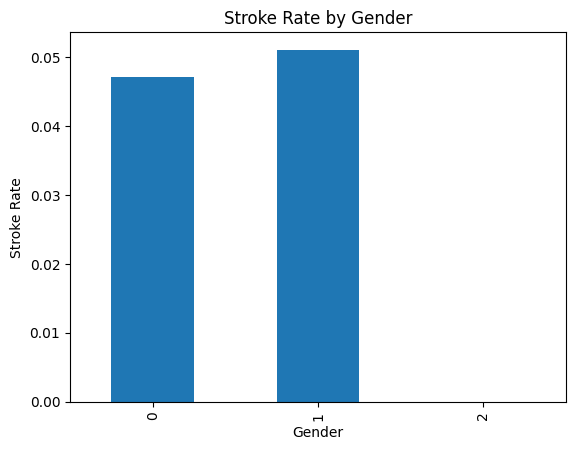

In [9]:
plt.figure()
data.groupby('gender')['stroke'].mean().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rate by Gender')
plt.show()